<a href="https://colab.research.google.com/github/EVARIST-DEV/EVARIST-DEV.github.io/blob/main/Relationships_between_Pixels_and_transformation_of_an_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Create a 5x5 test matrix for demonstration
test_matrix = np.array([[1, 2, 3, 4, 5],
                        [6, 7, 8, 9, 10],
                        [11, 12, 13, 14, 15],
                        [16, 17, 18, 19, 20],
                        [21, 22, 23, 24, 25]], dtype=np.uint8)

# Function to display the neighbors of a given pixel in an image
def display_neighbors(image, row, col):
    neighbors_4 = image[row-1:row+2, col-1:col+2]
    neighbors_8 = image[row-1:row+2, col-1:col+2]
    diagonal_neighbors = image[row-1:row+2, col-1:col+2]

    print("4-Point Neighbors:")
    print(neighbors_4)
    print("\n8-Point Neighbors:")
    print(neighbors_8)
    print("\nDiagonal Neighbors:")
    print(diagonal_neighbors)

# Call the function with row and column indices for the pixel you want to analyze
row_idx = 2
col_idx = 2
display_neighbors(test_matrix, row_idx, col_idx)


4-Point Neighbors:
[[ 7  8  9]
 [12 13 14]
 [17 18 19]]

8-Point Neighbors:
[[ 7  8  9]
 [12 13 14]
 [17 18 19]]

Diagonal Neighbors:
[[ 7  8  9]
 [12 13 14]
 [17 18 19]]


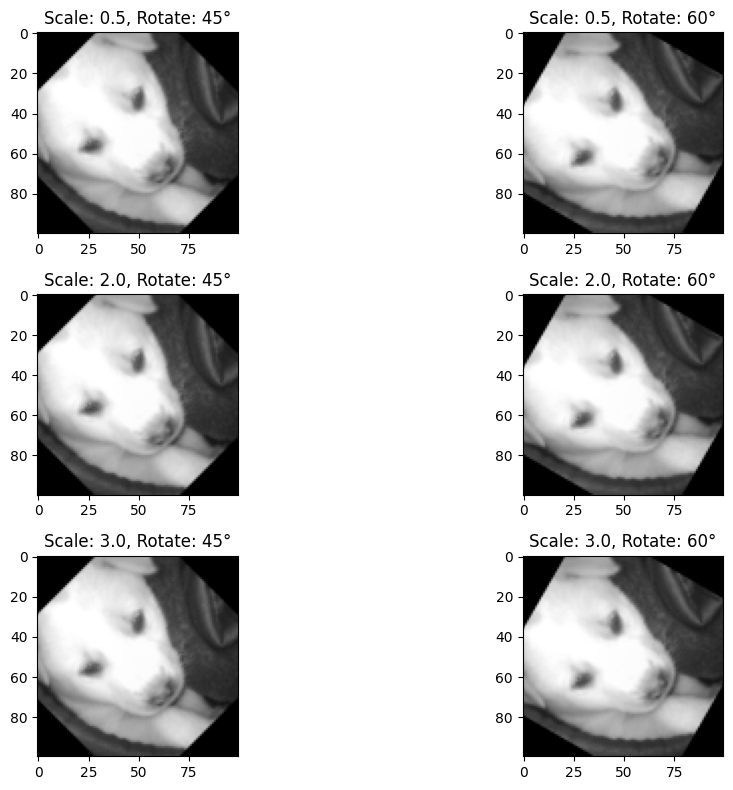

In [2]:
# Load a grayscale image
image_path = '/content/ex5_do_nawab-100x100.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Function to scale and rotate an image
def scale_and_rotate_image(image, scale_factor, rotation_angle):
    # Scaling
    scaled_image = cv2.resize(image, None, fx=scale_factor, fy=scale_factor)

    # Rotation
    height, width = image.shape
    center = (width // 2, height // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, rotation_angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))

    return scaled_image, rotated_image

# Apply scaling and rotation to the image
scale_factors = [0.5, 2.0, 3.0]
rotation_angles = [45, 60]

plt.figure(figsize=(12, 8))

for i, scale_factor in enumerate(scale_factors):
    for j, rotation_angle in enumerate(rotation_angles):
        scaled_image, rotated_image = scale_and_rotate_image(image, scale_factor, rotation_angle)

        plt.subplot(len(scale_factors), len(rotation_angles), i * len(rotation_angles) + j + 1)
        plt.imshow(rotated_image, cmap='gray')
        plt.title(f"Scale: {scale_factor}, Rotate: {rotation_angle}°")

plt.tight_layout()
plt.show()
